### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### Import data into tensorflow dataset object
Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/

In [2]:
# assign constant variables
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
# generate training batches which have tensor image data 
# with real-time data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

train_generator =train_datagen.flow_from_directory(
    'dataset/train/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 1506 images belonging to 3 classes.


In [4]:
# print the classes indices
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
# print the class names
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
# let's check the tensor of image
for image_batch, label_batch in train_generator:
    print(label_batch[0])
    print(image_batch[0])
    break

0.0
[[[0.6522512  0.6483296  0.7110747 ]
  [0.6608632  0.65694165 0.71968675]
  [0.6568986  0.65297705 0.71572214]
  ...
  [0.63402325 0.6261801  0.6771605 ]
  [0.646051   0.63820785 0.68918824]
  [0.65807873 0.6502356  0.70121604]]

 [[0.6502465  0.64632493 0.70907   ]
  [0.65952677 0.6556052  0.71835035]
  [0.6582351  0.6543135  0.7170586 ]
  ...
  [0.6894216  0.68157846 0.73255885]
  [0.6707117  0.66286856 0.713849  ]
  [0.65200186 0.6441587  0.6951391 ]]

 [[0.64824194 0.64432037 0.70706546]
  [0.65819037 0.6542688  0.7170139 ]
  [0.6595714  0.65564984 0.71839494]
  ...
  [0.59048915 0.582646   0.6336264 ]
  [0.596503   0.5886599  0.6396403 ]
  [0.6025169  0.59467375 0.64565414]]

 ...

 [[0.7826703  0.77874875 0.80227816]
  [0.7793293  0.77540773 0.79893714]
  [0.7759882  0.77206665 0.79559606]
  ...
  [0.6830171  0.67125237 0.69870335]
  [0.6117047  0.59994    0.627391  ]
  [0.6482258  0.6364611  0.66391206]]

 [[0.7781284  0.7742068  0.7977362 ]
  [0.78414226 0.7802207  0.803750

In [7]:
# validation data generator
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
# test data generator
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.64919686 0.62566745 0.6413537 ]
  [0.6478377  0.6243083  0.63999456]
  [0.6466896  0.6231602  0.63884646]
  ...
  [0.64093256 0.5977953  0.6134816 ]
  [0.56697226 0.523835   0.5395213 ]
  [0.5951437  0.5520064  0.5676927 ]]

 [[0.69077337 0.66724396 0.68293023]
  [0.6904027  0.6668733  0.68255955]
  [0.6895944  0.666065   0.68175125]
  ...
  [0.64266235 0.5995251  0.61521137]
  [0.56413037 0.5209931  0.5366794 ]
  [0.59650284 0.5533656  0.56905186]]

 [[0.7011989  0.67766947 0.69335574]
  [0.7016932  0.67816377 0.69385004]
  [0.70179087 0.67826146 0.69394773]
  ...
  [0.64439225 0.60125494 0.6169412 ]
  [0.5612885  0.5181512  0.5338375 ]
  [0.597862   0.55472475 0.570411  ]]

 ...

 [[0.526      0.4828628  0.49854907]
  [0.50617534 0.4630381  0.47872436]
  [0.49429932 0.45116207 0.46684834]
  ...
  [0.5570528  0.5099939  0.5256802 ]
  [0.5545816  0.50752276 0.52320904]
  [0.5521103  0.5050515  0.52073777]]

 [[0.52515566 0.4820184  0.49770468]
  [0.5056875  0.46255022 0.4782365 ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

## Compiling the Model

In [12]:
# use adam Optimizer, SparseCategoricalCrossentropy for losses,
#  accuracy as a metric

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
# check steps_per_epoch for model.fit for train dataset
# total_images / batch_size
1506/32


47.0625

In [14]:
# check steps_per_epoch for model.fit for validation dataset
# total_images / batch_size
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 46s 952ms/step - loss: 0.9037 - accuracy: 0.5075 - val_loss: 0.8725 - val_accuracy: 0.6562
Epoch 2/20
47/47 [==============================] - 45s 947ms/step - loss: 0.7442 - accuracy: 0.6452 - val_loss: 0.6120 - val_accuracy: 0.7083
Epoch 3/20
47/47 [==============================] - 44s 951ms/step - loss: 0.4645 - accuracy: 0.8046 - val_loss: 0.5257 - val_accuracy: 0.7604
Epoch 4/20
47/47 [==============================] - 44s 937ms/step - loss: 0.3158 - accuracy: 0.8738 - val_loss: 0.3362 - val_accuracy: 0.8854
Epoch 5/20
47/47 [==============================] - 45s 948ms/step - loss: 0.5515 - accuracy: 0.7544 - val_loss: 0.5625 - val_accuracy: 0.7083
Epoch 6/20
47/47 [==============================] - 45s 953ms/step - loss: 0.3809 - accuracy: 0.8406 - val_loss: 0.3374 - val_accuracy: 0.8438
Epoch 7/20
47/47 [==============================] - 44s 932ms/step - loss: 0.3558 - accuracy: 0.8623 - val_loss: 0.5864 - val_accuracy: 0.7448

In [16]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 6s 454ms/step - loss: 0.0803 - accuracy: 0.9768


In [17]:
scores

[0.08027529716491699, 0.9767981171607971]

### Plotting the Accuracy and Loss Curves

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##### loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9036839008331299,
 0.7442383766174316,
 0.4645048975944519,
 0.31579798460006714,
 0.5514605045318604]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.65625,
 0.7083333134651184,
 0.7604166865348816,
 0.8854166865348816,
 0.7083333134651184,
 0.84375,
 0.7447916865348816,
 0.8802083134651184,
 0.890625,
 0.9166666865348816,
 0.9114583134651184,
 0.9739583134651184,
 0.921875,
 0.96875,
 0.96875,
 0.921875,
 0.984375,
 0.9791666865348816,
 0.9739583134651184,
 0.984375]

In [26]:
acc

[0.5074626803398132,
 0.6451831459999084,
 0.8046132922172546,
 0.873812735080719,
 0.7544097900390625,
 0.8405698537826538,
 0.8622795343399048,
 0.8514246940612793,
 0.9009497761726379,
 0.9253731369972229,
 0.9124830365180969,
 0.9382632374763489,
 0.9626865386962891,
 0.9715061187744141,
 0.9721845388412476,
 0.9762550592422485,
 0.9694707989692688,
 0.9816824793815613,
 0.9708276987075806,
 0.9823608994483948]

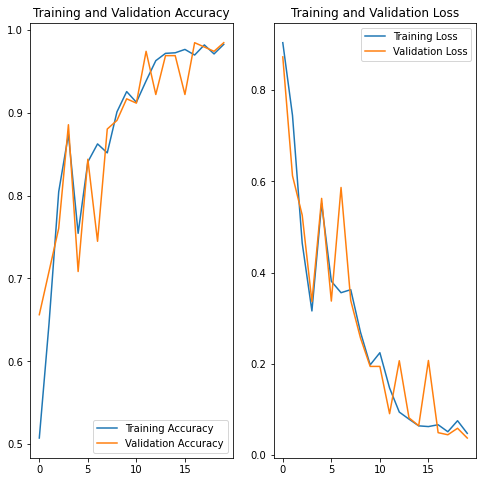

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


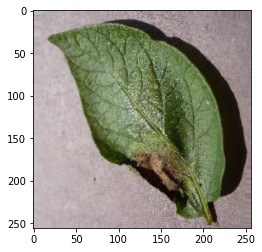

In [28]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### Now run inference on few sample images

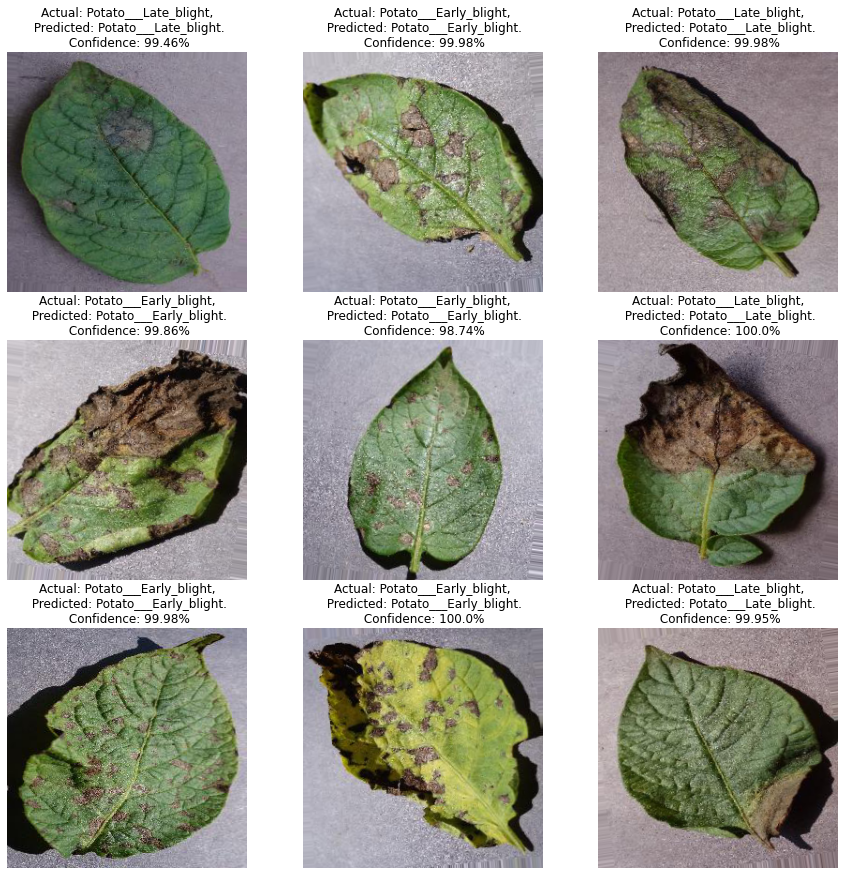

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## Saving the Model
Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [31]:
model.save("../potatoes1.h5")